In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as sm
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
sns.set()

pd.set_option('display.max_columns', 30)

In [147]:
df = pd.read_csv('bank-additional-full.csv', sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [148]:
print('Numero de features: ' + str(df.shape[1]))

Numero de features: 21


In [149]:
# Tipos de datos:

df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [150]:
# Balance de datos del target 'y':

df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [151]:
# Balance de datos % del target 'y':

a = {'%': [df['y'].value_counts()[1]*100/(df['y'].value_counts()[0] + df['y'].value_counts()[1]),
           df['y'].value_counts()[0]*100/(df['y'].value_counts()[0] + df['y'].value_counts()[1])]}

balance = pd.DataFrame (a, index = ['Yes', 'No'])

balance

,%
Yes,11.265417
No,88.734583


In [152]:
# Cantidad de nulos:

df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [153]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Análisis Univariado:

Se van a evaluar los atributos que tiene el data set para ver que tipo de distribuciones tiene cada uno, asi como evaluación de outliers:

In [154]:
# Voy a crear una Lista de categorias de edad, para poder hacer una mejor visualización de las distribuciones de edades:

Categoria_Edad = []
for i in range(len(df)):
    if df.loc[i,'age'] < 20:
        Categoria_Edad.append('Menor a 20')
        i =+ 1
    elif df.loc[i,'age'] < 31:
        Categoria_Edad.append('Entre 20 y 30')
        i =+ 1
    elif df.loc[i,'age'] < 36:
        Categoria_Edad.append('Entre 31 y 35')
        i =+ 1
    elif df.loc[i,'age'] < 41:
        Categoria_Edad.append('Entre 36 y 40')
        i =+ 1
    elif df.loc[i,'age'] < 46:
        Categoria_Edad.append('Entre 41 y 45')
        i =+ 1
    elif df.loc[i,'age'] < 51:
        Categoria_Edad.append('Entre 46 y 50')
        i =+ 1
    elif df.loc[i,'age'] < 56:
        Categoria_Edad.append('Entre 51 y 55')
        i =+ 1
    elif df.loc[i,'age'] < 61:
        Categoria_Edad.append('Entre 56 y 60')
        i =+ 1
    elif df.loc[i,'age'] < 71:
        Categoria_Edad.append('Entre 61 y 70')
        i =+ 1
    else:
        Categoria_Edad.append('Mayor a 70')
        i =+ 1
        
# Voy a agregar la lista al DataFrame para poder graficar los datos con seaborn a partir del DataFrame:

DF_Visualizacion = df.copy()
DF_Visualizacion['Categoria_Edad'] = Categoria_Edad
DF_Visualizacion.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Categoria_Edad
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Entre 56 y 60
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Entre 56 y 60
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Entre 36 y 40
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Entre 36 y 40
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,Entre 56 y 60


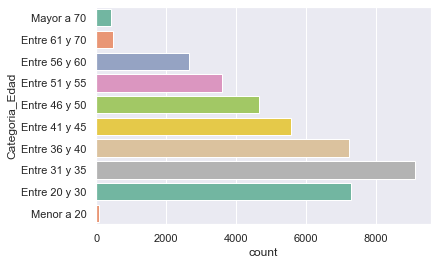

In [155]:
# Voy a ver el conteo de cada variable para entenderlas un poco mejor:

sns.countplot(y = 'Categoria_Edad', data = DF_Visualizacion, palette = 'Set2', order = 
                                                                                    ['Mayor a 70',
                                                                                     'Entre 61 y 70',
                                                                                     'Entre 56 y 60',
                                                                                     'Entre 51 y 55',
                                                                                     'Entre 46 y 50',
                                                                                     'Entre 41 y 45',
                                                                                     'Entre 36 y 40',
                                                                                     'Entre 31 y 35',
                                                                                     'Entre 20 y 30',
                                                                                     'Menor a 20']
             );

Se puede observar que el bulk de personas que recibieron la llamada esta entre 20 y 40 años.

<AxesSubplot:xlabel='count', ylabel='job'>

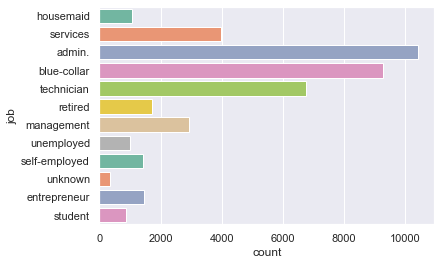

In [156]:
sns.countplot(y = 'job', data = DF_Visualizacion, palette = 'Set2')

Se puede ver que los 3 trabajos mas comunes entre las personas que recibieron la llamada son: Administrativos, técnicos y blue-collar (trabajadores de manualidades).

<AxesSubplot:xlabel='count', ylabel='marital'>

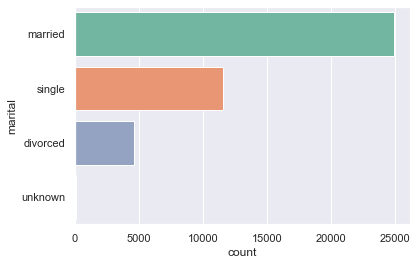

In [157]:
sns.countplot(y = 'marital', data = DF_Visualizacion, palette = 'Set2')

<AxesSubplot:xlabel='count', ylabel='education'>

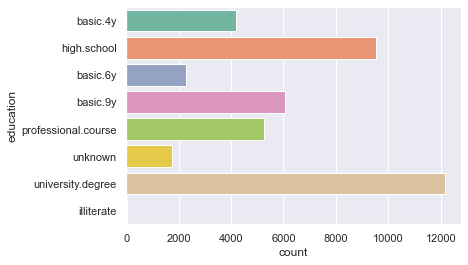

In [158]:
sns.countplot(y = 'education', data = DF_Visualizacion, palette = 'Set2')

<AxesSubplot:xlabel='count', ylabel='housing'>

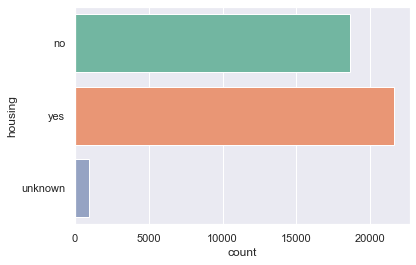

In [159]:
sns.countplot(y = 'housing', data = DF_Visualizacion, palette = 'Set2')

En housing se puede ver un balance bastante parejo entre "yes" y "no". Tambien se ve que hay "unknown". Seria interesante poder investigar si estos son por un error en le data set y si la probabilidad de este valor tiene alguna correlación con otro atributo.

<AxesSubplot:xlabel='count', ylabel='month'>

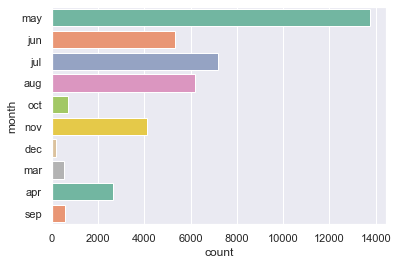

In [160]:
sns.countplot(y = 'month', data = DF_Visualizacion, palette = 'Set2')

Se puede observar que la mayoria de las llamadas se realizaron durante el mes de Mayo. Importante notar que durante Enero y Febrero no se realizaron llamadas. Posiblemente porque pueden ser meses de vacaciones en Brazil, donde la gente no esta en su casa y tampoco se cuenta con tantos vendedores en el banco.

<AxesSubplot:xlabel='count', ylabel='day_of_week'>

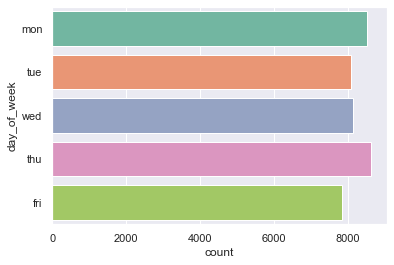

In [161]:
sns.countplot(y = 'day_of_week', data = DF_Visualizacion, palette = 'Set2')

Se ve muy pareja la cantidad de llamados durante la semana.

<AxesSubplot:xlabel='count', ylabel='emp.var.rate'>

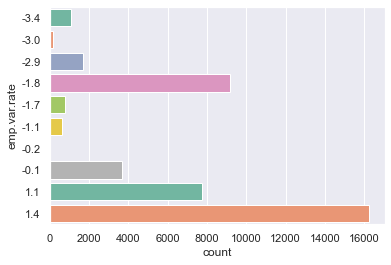

In [162]:
sns.countplot(y = 'emp.var.rate', data = DF_Visualizacion, palette = 'Set2')

emp.var.rate es el employment variation rate. Evalua el cambio en cantidad de empleos de cuarto a cuarto de año. Es interesante ver que en cuartos donde este valor es positivo, es cuando mas llamadas se realizaron.

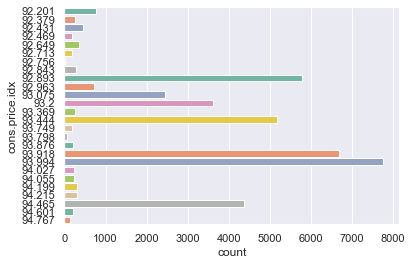

In [163]:
sns.countplot(y = 'cons.price.idx', data = DF_Visualizacion, palette = 'Set2');

cons.price.idx es consumer price index. Es una medida de los precios de bienes durante un dado mes.

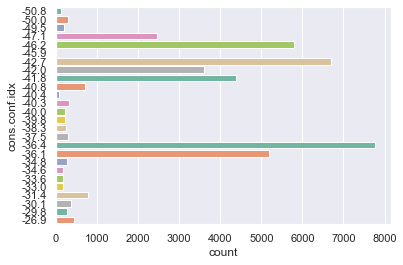

In [164]:
sns.countplot(y = 'cons.conf.idx', data = DF_Visualizacion, palette = 'Set2');

cons.conf.idx es consumer confidence index. Es una medida de cuanto estan gastando los consumidores y tambien se mide mensualmente.

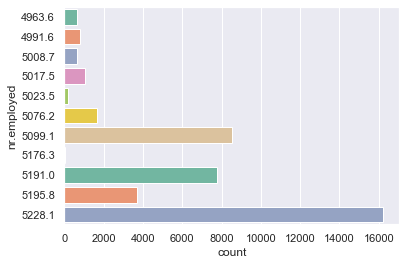

In [165]:
sns.countplot(y = 'nr.employed', data = DF_Visualizacion, palette = 'Set2');

number of employees: Indicador de la cantidad de personas empleadas en el banco al momento de realizar la llamda, tendría que aportar información.
Se ve que se realizaron mas llamadas cuando este valor alcanzo su máximo de 5228.1

<AxesSubplot:xlabel='count', ylabel='y'>

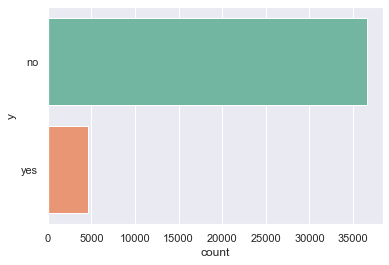

In [166]:
sns.countplot(y = 'y', data = DF_Visualizacion, palette = 'Set2')

Nuevamente vemos el desbalance en el atributo target.

A continuación voy a ver la distribución de algunas de las variables numéricas, para ver si
tienen distribución normal o no:

In [167]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


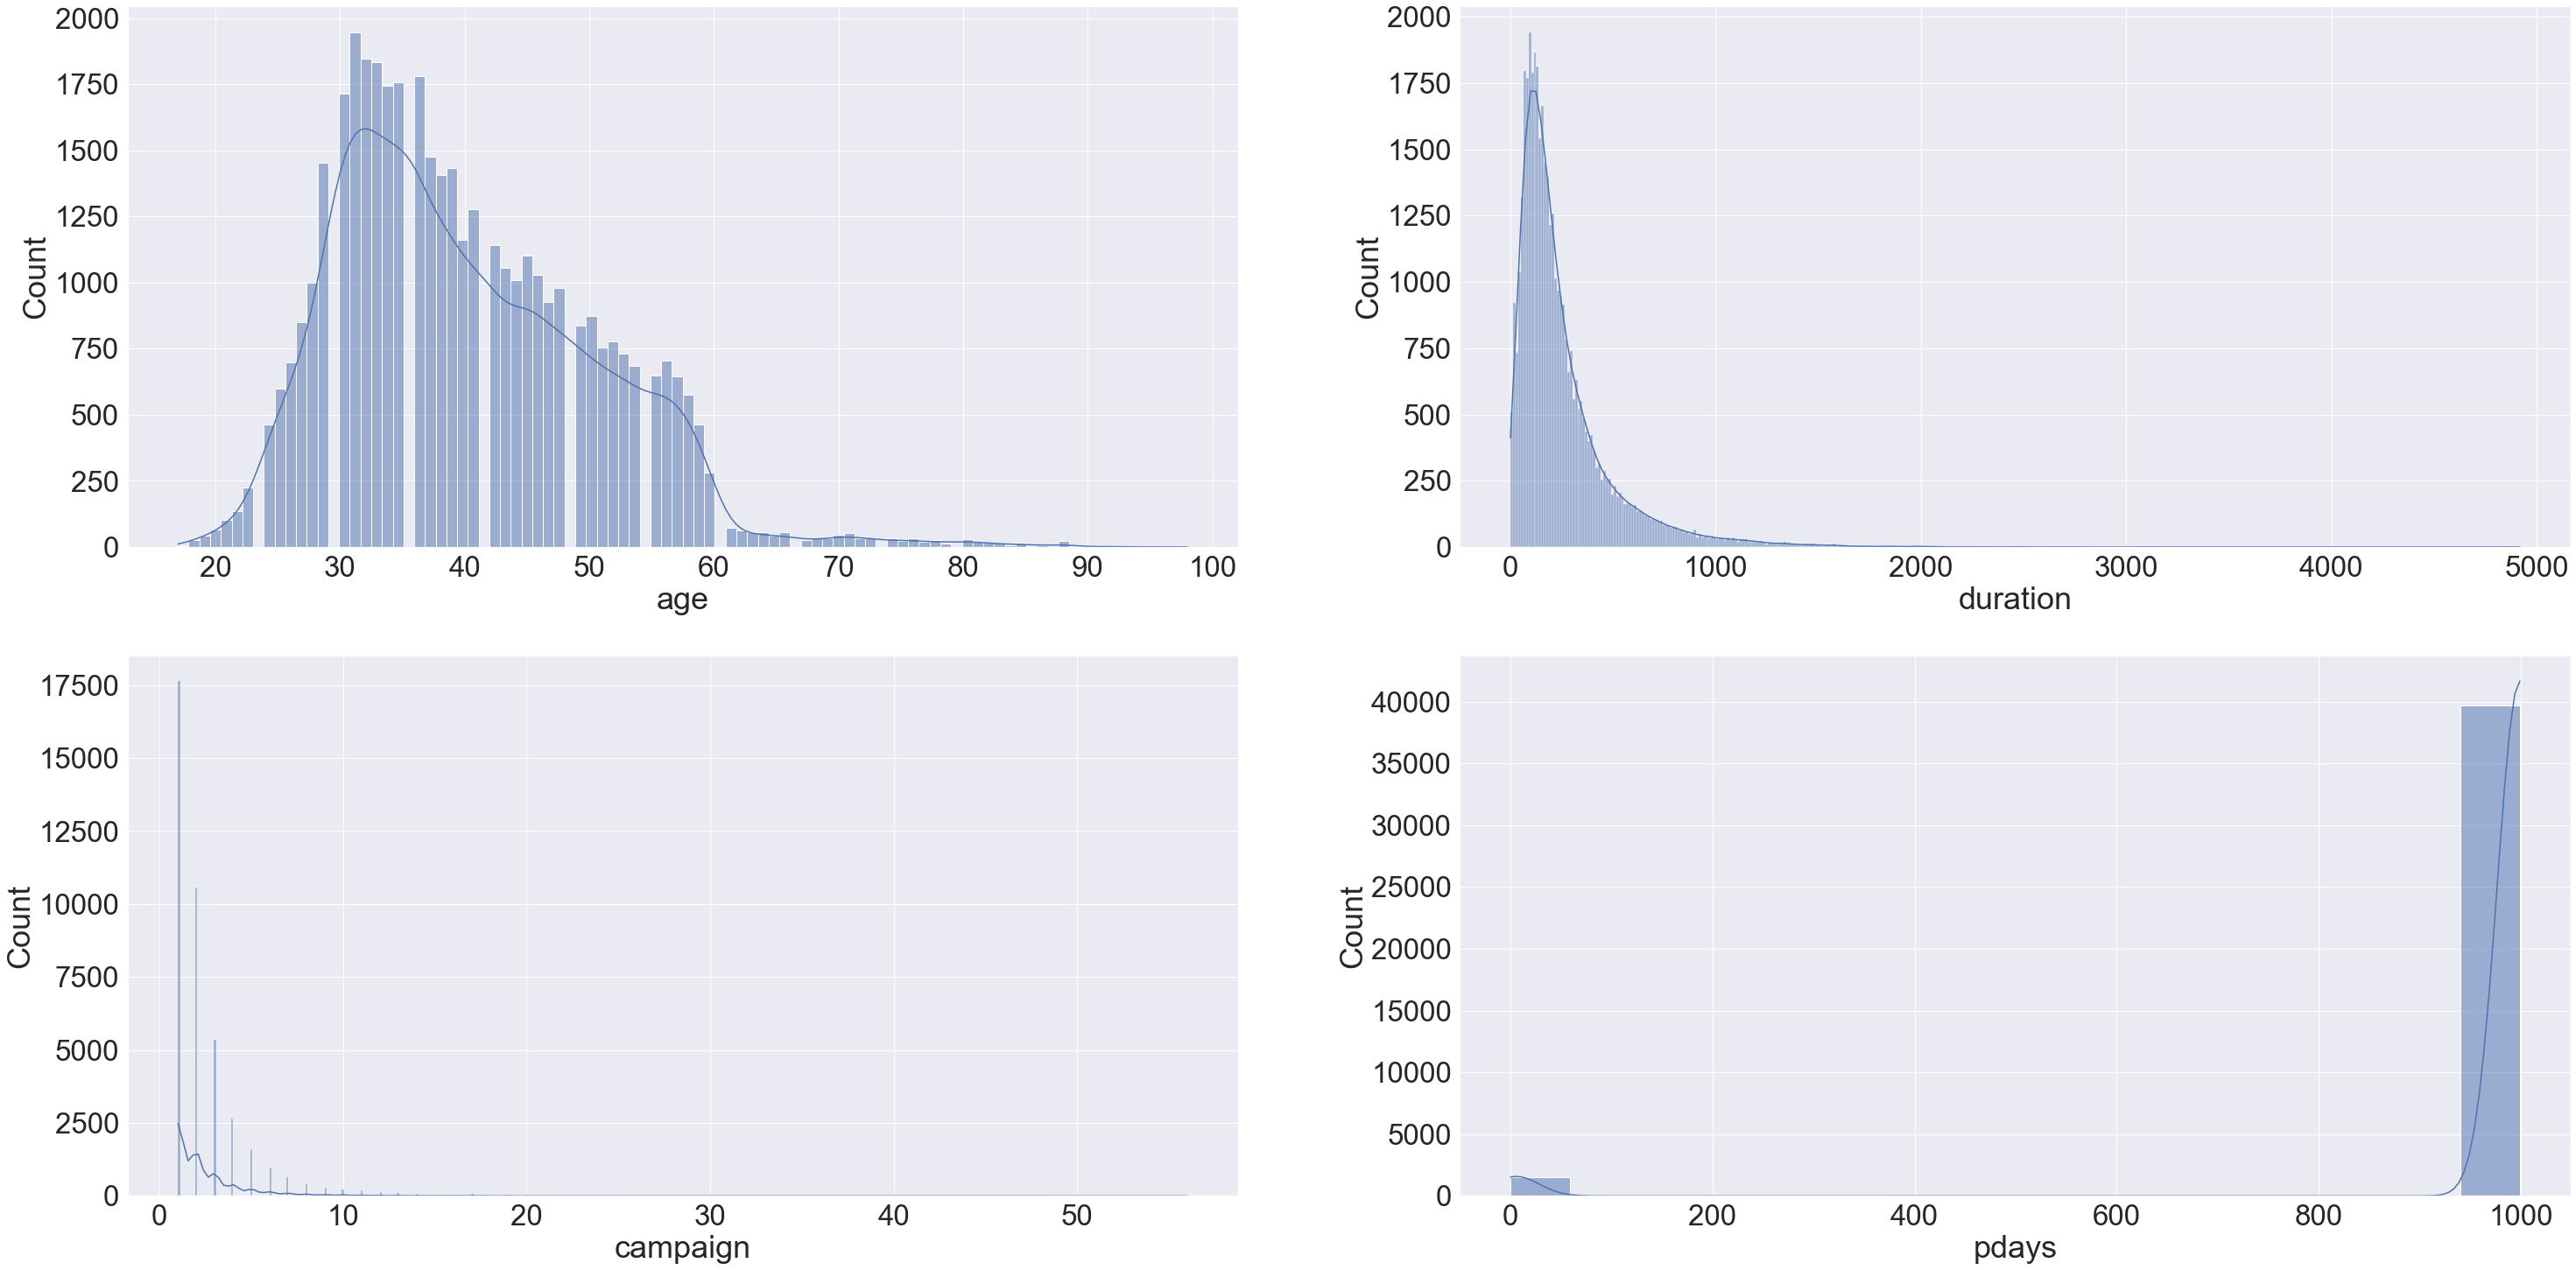

In [168]:
sns.set(font_scale = 3)
figure, axis = plt.subplots(2, 2, figsize = (50,25))
sns.histplot(data = df, x = df['age'], ax=axis[0,0], kde = True)
sns.histplot(data = df, x = df['duration'], ax=axis[0,1], kde = True)
sns.histplot(data = df, x = df['campaign'], ax=axis[1,0], kde = True)
sns.histplot(data = df, x = df['pdays'], ax=axis[1,1], kde = True);

Se puede observar que ninguna distribución parece ser normal. Tanto 'age', 'duration y 'campaign' parecen tener colas a la derecha. Esto es entendible ya que:

- Respecto a age ya vimos que hay una acumulación de valores entre 20 y 40 años.
- Respecto a duration, este valor representa el valor de la duración de la llamada. Sabemos que el atributo 'y' esta muy desbalanceado, mostrando que un 85% de los clientes no toman el plazo fijo. Es razonable pensar que llamadas en las que no se concreta el ofrecimiento, terminen mucho mas rápido que en las que si se acepta.
- Respecto a campaign, vemos que es razonable que haya mayor cantidad de clientes a los que se contacto pocas veces, que clientes que se contactaron varias veces. Esto seguramente se da porque por decision del negocio, a algunos clientes se les deja de insistir y se sigue con otros. Tambien es razonable pensar que si un cliente toma el plazo fijo luego del primer contacto, no se va a continuar llamandolo, por lo que es razonable que exista una cola derecha.

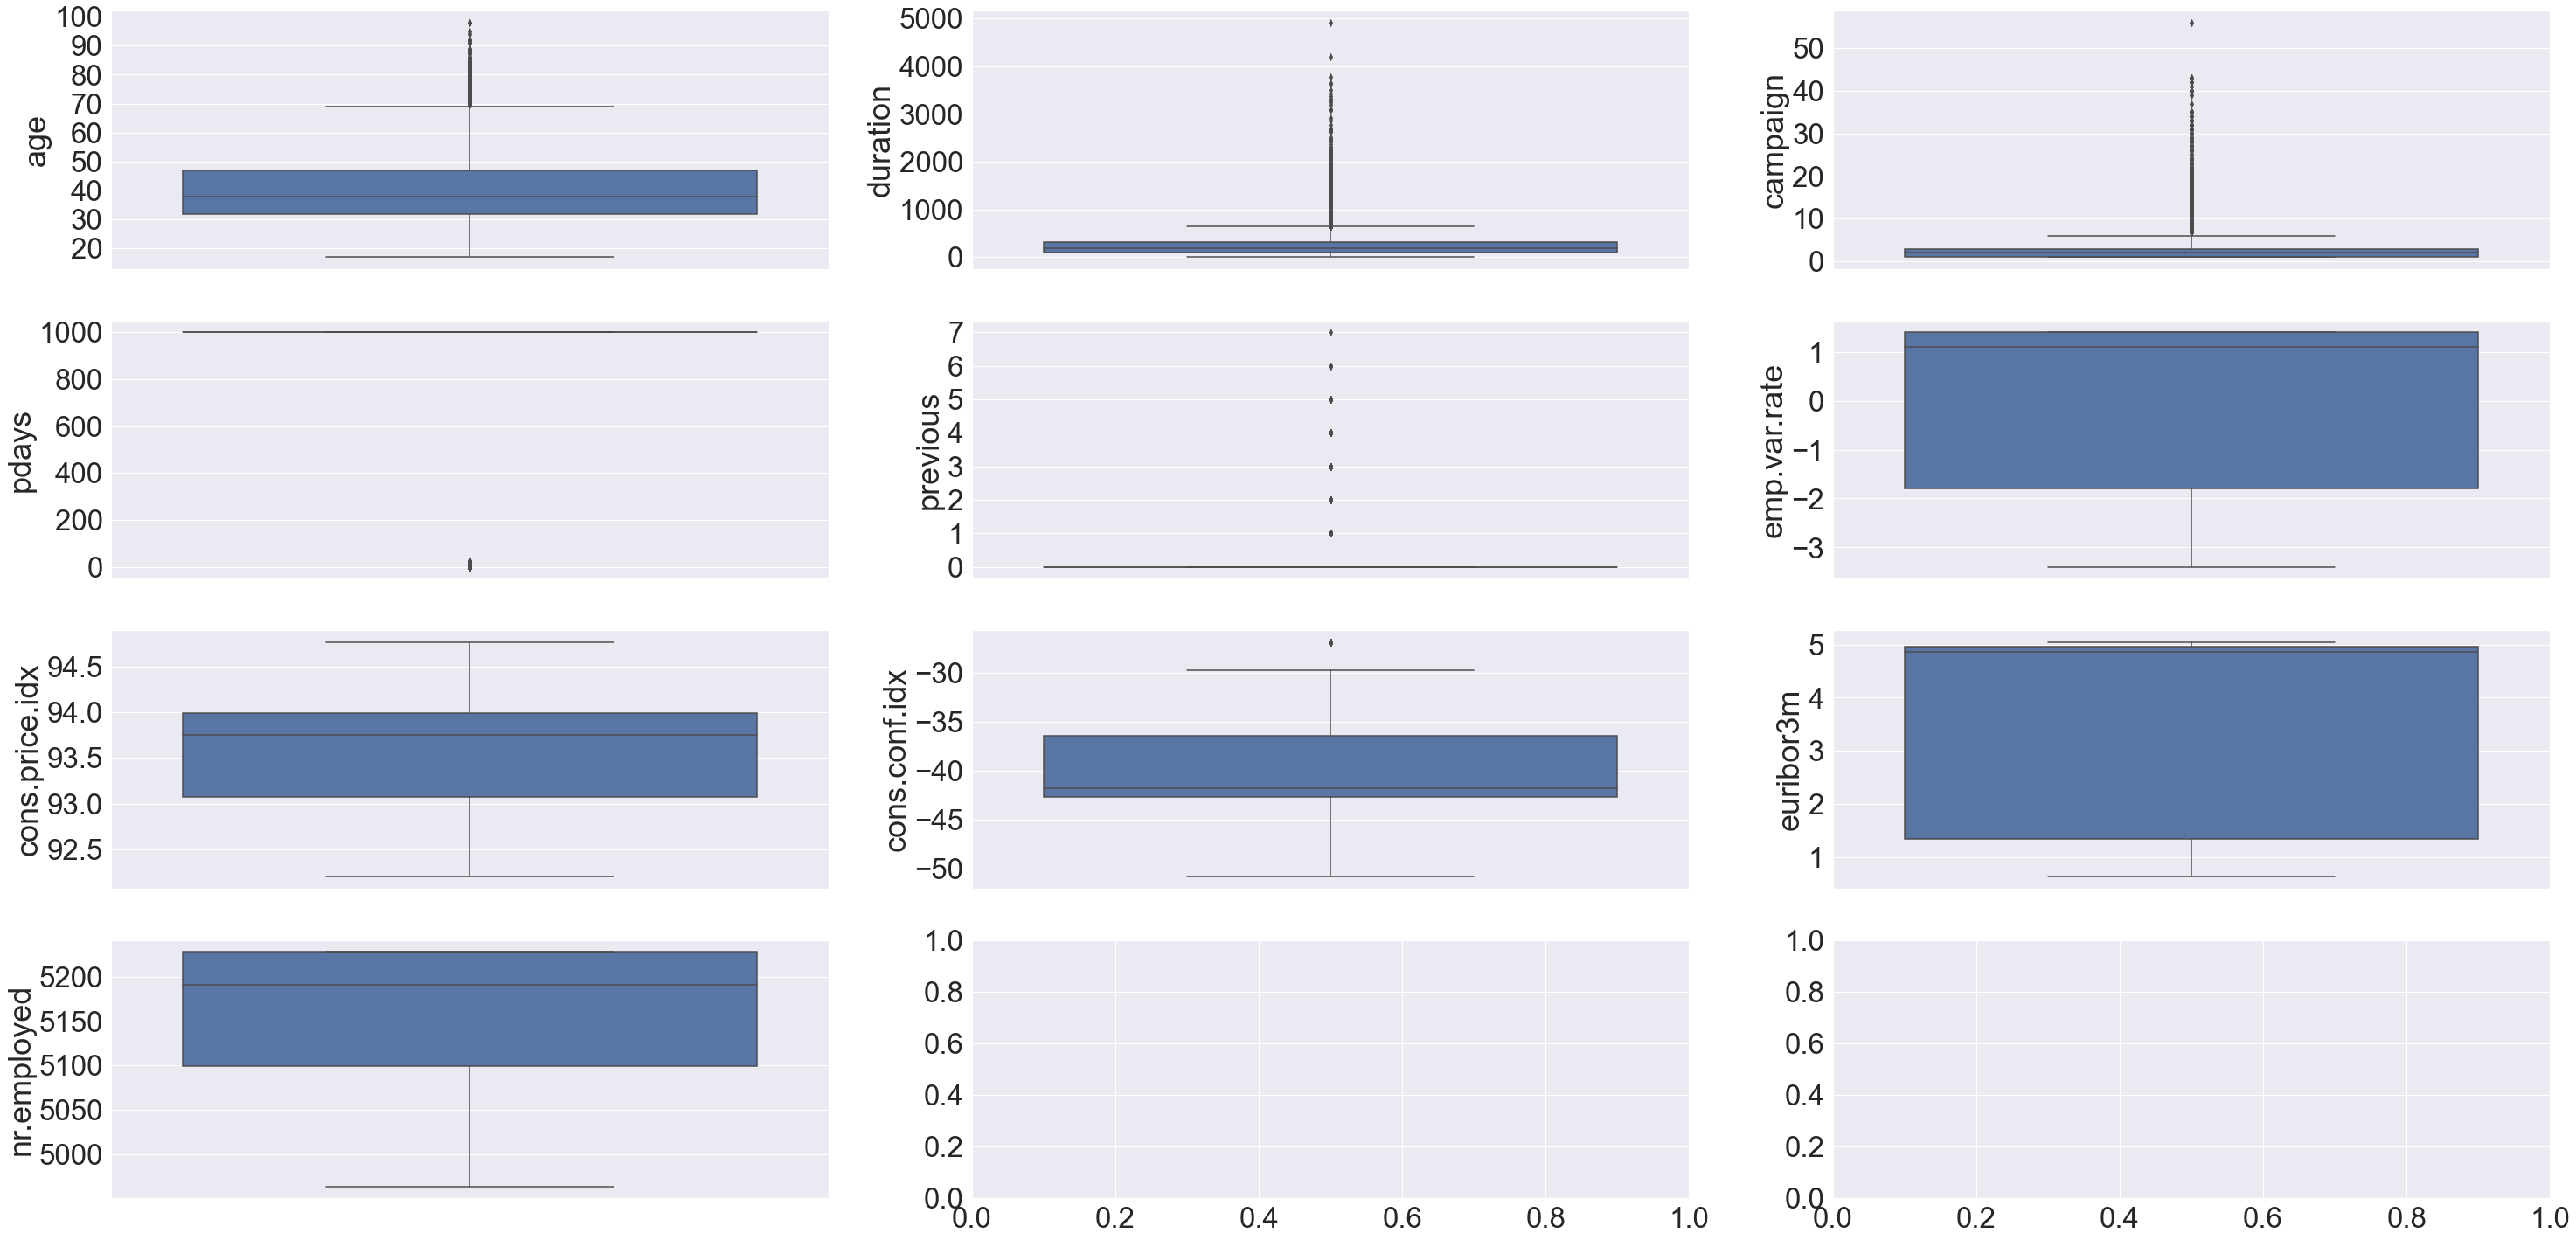

In [169]:
# A continuación vamos a ver algunos boxplots de variables númericas para evaluar presencia de outliers:

sns.set(font_scale = 3)
figure, axis = plt.subplots(4, 3, figsize = (50,25))
sns.boxplot(data = df, y = df['age'], ax=axis[0,0])
sns.boxplot(data = df, y = df['duration'], ax=axis[0,1])
sns.boxplot(data = df, y = df['campaign'], ax=axis[0,2])
sns.boxplot(data = df, y = df['pdays'], ax=axis[1,0])
sns.boxplot(data = df, y = df['previous'], ax=axis[1,1])
sns.boxplot(data = df, y = df['emp.var.rate'], ax=axis[1,2])
sns.boxplot(data = df, y = df['cons.price.idx'], ax=axis[2,0])
sns.boxplot(data = df, y = df['cons.conf.idx'], ax=axis[2,1])
sns.boxplot(data = df, y = df['euribor3m'], ax=axis[2,2])
sns.boxplot(data = df, y = df['nr.employed'], ax=axis[3,0])
sns.set();

Podemos ver que en los boxplot, hay presencia de outliers en age, duration, campaign, pdays, previous y cons.conf.idx. Todos menos pdays tienen outliers posicionados en la parte superior del boxplot. Como vimos anteriormente, la misma explicación podria aplicar a age, duration y campaign. Para previous, se ve que hay muchos casos en 0, por lo que todos los casos diferentes de cero serian outliers.
El caso de pdays hay que investigarlo mas para entender que esta pasando. Segun el diccionario de atributos, el valor 999 corresponde a clientes no contactados anteriormente, por lo que podriamos estar viendo muchos clientes que nunca fueron contactados (por eso el cluster cerca de 1000) y en realidad los valores reales que tenemos que analizar se encuentran abajo.

A continuación vamos a reemplazar los valores 999 de pdays por 0 ya que es el número que mejor representa la cantidad de contactos previos que se tuvieron con el cliente:

In [170]:
df['pdays'] = df['pdays'].replace(999, 0)

<AxesSubplot:ylabel='pdays'>

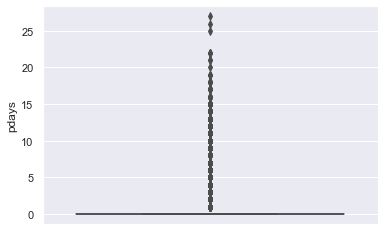

In [171]:
sns.boxplot(data = df, y = df['pdays'])

# Análisis Bivariado

Para el análisis bivariado vamos a probar algunas de las relaciones que parecen interesante entender si tienen algun tipo de relación:

- emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m y nr.employed son todos valores numericos relacionados al bienestar economico de los usuarios target, por lo que seria razonable pensar que estan relacionados.
- Ver las relaciones que existen con el target, tomando en cuenta la cantidad de sucesos.

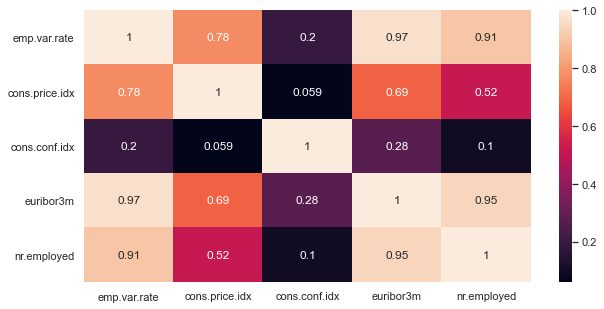

In [172]:
df_numericos = df[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

plt.figure(figsize=(10,5))
Correlaciones = sns.heatmap(df_numericos.corr(),annot =True)
Correlaciones;

Como se puede ver, existe gran correlación de Pearson entre: emp.var.rate, cons.price.idx, euribor3m y nr.employed. No hay tanta relación con cons.conf.idx.
Se podria pensar que cuando se aplique el modelo, se podria utilizar solo 1 o 2 de estos atributos para no tener tanta multicolinealidad. Tambien se podria utilizar PCA entre estas variables para ver cuantas conviene usar.

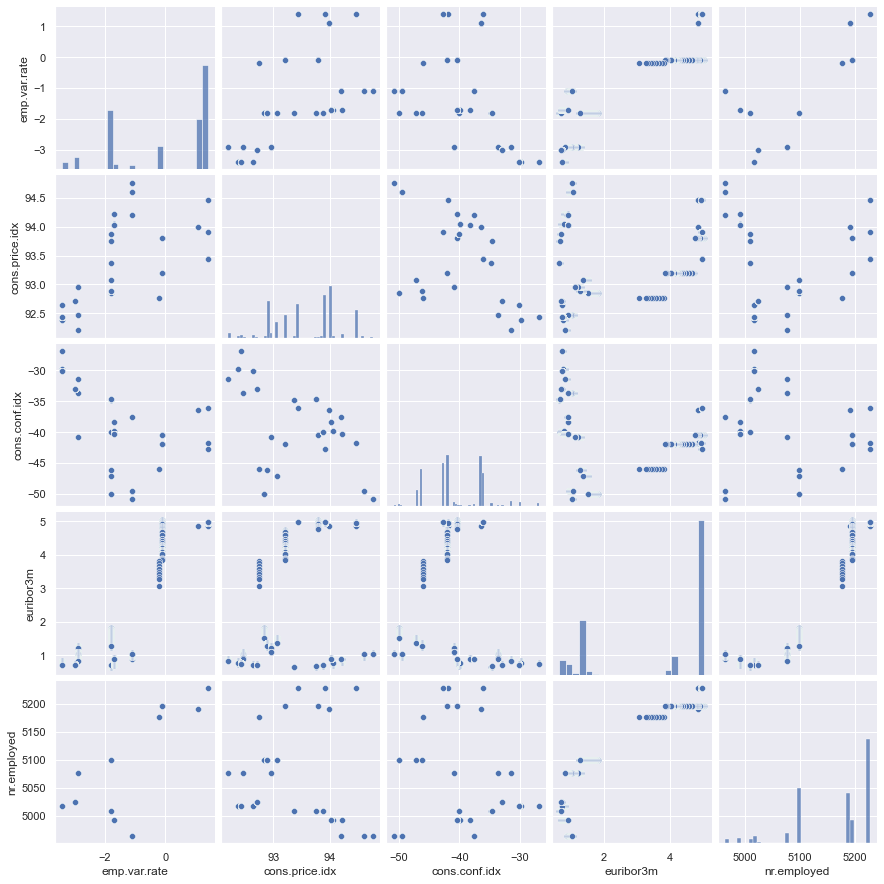

In [173]:
sns.pairplot(df_numericos)

Los pares nr.employed/emp.var.rate, euribor3m/emp.var.rate, cons.price.idx/emp.var.rate y nr.employed/euribor3m parecen tener relaciones lineales asociadas, por lo que podriamos a futuro reemplazar uno para representar a los otros.  

In [174]:
# Vamos a aplicar PCA a estas variables para tratar de entender un poco mejor que poder explicativo tienen y que
# componentes principales podemos encontrar:

# Primero tomamos solo las variables que vamos a utilizar y estandarizar para poder aplicar PCA. Para esto vamos a
# utilizar StandardScaler:
sc = StandardScaler()
df_numericos = sc.fit_transform(df_numericos)

# Luego vamos a aplicar PCA para ver que componentes principales podemos encontrar:

pca = PCA()
df_numericos = pca.fit_transform(df_numericos)

# A continuación vamos a ver que poder explicativo contiene cada uno de los componentes principales en relación a las
# variables originales:

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.69421113, 0.19655831, 0.1020554 , 0.00503428, 0.00214088])

Se puede ver que con solo los 2 principales componentes obtenemos un poder explicativo de varianza de aproximadamente 90%. Esto indicaria que podriamos utilizar estas 2 variables en lugar de todas las contenidas en df_numericos dentro del modelo.
Con esto nos estariamos asegurando:

- Que estamos usando menos variables, disminuyendo la potencia de computo necesaria para el modelo
- Estamos utilizando variables ortogonales entre si. Esto asegura que no existe multicolinealidad entre variables independientes. Esto es una condición para aplicar muchos de los modelos mas comunmente usados.

# Análisis multivariado

Quiero poder diferenciar cada atributo entre casos en los que se acepto el plazo fijo y casos en los que no. Al estar muy desbalanceado el target, va a ser dificil sacar algun tipo de conclusión de hacer histogramas simplemente separando con hue cada caso, ya que no seran comparables las alturas de las barras. Podria probarse esto luego de utilizar algun método de balanceo. 
Mientras tanto, voy a crear una función que tome cada columna del Dataframe y arme un scatterplot que indique segun cada atributo, como varia el valor de y, siendo y el promedio de casos en los que se acepto el plazo fijo.
Tambien voy a diferenciar con cambios de color el conteo de casos. Tambien voy a agregar una linea roja donde esta el promedio del ratio de casos que se tomo el plazo fijo.
Voy a enfocarme en buscar partes de graficos donde puntos con alto conteo de casos se alejan de la línea roja. Esto podria significar que hay una tendencia interesante para analizar.

In [175]:
def grafico_balanceador(columna):
    Dataframe = df[[columna, 'y']]
    Dataframe['y'] = Dataframe['y'].replace('no', 0)
    Dataframe['y'] = Dataframe['y'].replace('yes', 1)
    Para_graficar = Dataframe.groupby(columna).y.agg(['count', 'mean'])
    grafico = sns.scatterplot(data = Para_graficar, x = columna, y = 'mean', hue = 'count', palette = 'crest')
    grafico.axhline(Dataframe.y.mean(), color = 'r')
    grafico.tick_params(axis='x', rotation=90)
    plt.show

<ipython-input-175-b09e2dde04e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe['y'] = Dataframe['y'].replace('no', 0)
<ipython-input-175-b09e2dde04e6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe['y'] = Dataframe['y'].replace('yes', 1)


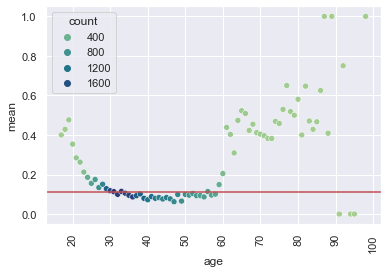

In [176]:
grafico_balanceador('age')

Se puede ver como hay un rango de edades entre 30 y un poco antes de 60 donde la proporción de toma de plazos fijos baja por debajo del promedio. Por edades mayores sube bastante. Esto se puede deber a la poca cantidad de muestras fuera de este rango etario, por lo que no serian tan significativos para analizar.
Si se ve mas en detalle, se puede ver un grupo de personas entre 25 y 30 años que tienen un ratio de toma de plazos fijos ligeramente mayor al promedio, con una densidad de casos intermedia. Esto podria estar mostrando que este grupo de personas tienen mas tendencia a aceptar el trato.

A continuación se va a realizar un test chi2 para evaluar si efectivamente existe relación entre la variable age y el target:

H0 = Age y target son independientes
H1 = Age y target no son independientes, y por lo tanto estan relacionadas

In [177]:
# Hago reshape de age para que pueda entrar bien en el el test de hipotesis

x = df.age.values.reshape(-1,1)
x.shape

(41188, 1)

In [178]:
chi2(x, df.y)

(array([103.27414516]), array([2.9183714e-24]))

Mediante un test chi2, podemos confirmar que las variables age y el target estan relacionadas (aunque no sabemos todavia que tipo de relación tienen) ya que se obtuvo un p-valor muy bajo.

<ipython-input-175-b09e2dde04e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe['y'] = Dataframe['y'].replace('no', 0)
<ipython-input-175-b09e2dde04e6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe['y'] = Dataframe['y'].replace('yes', 1)


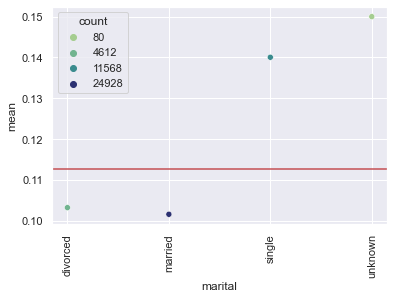

In [179]:
grafico_balanceador('marital')

Con este gráfico podemos ver que la probabilidad de tomar el plazo fijo sube considerablemente si la persona es soltera.

<ipython-input-175-b09e2dde04e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe['y'] = Dataframe['y'].replace('no', 0)
<ipython-input-175-b09e2dde04e6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe['y'] = Dataframe['y'].replace('yes', 1)


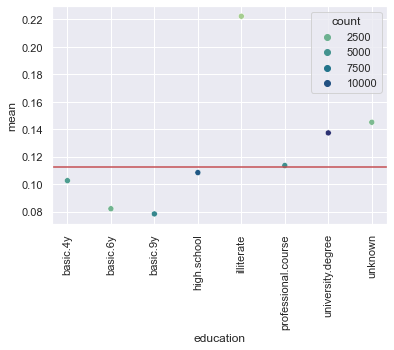

In [180]:
grafico_balanceador('education')

<ipython-input-175-b09e2dde04e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe['y'] = Dataframe['y'].replace('no', 0)
<ipython-input-175-b09e2dde04e6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe['y'] = Dataframe['y'].replace('yes', 1)


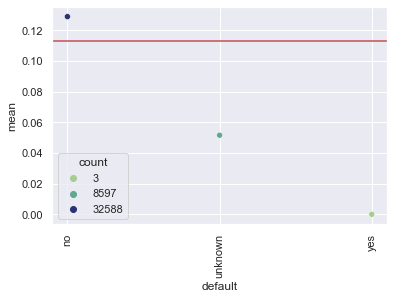

In [181]:
grafico_balanceador('default')

En este grafico podemos apreciar que las pocas personas que tienen un prestamo en default no toman este plazo fijo, lo cual es bastante lógico.

<ipython-input-175-b09e2dde04e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe['y'] = Dataframe['y'].replace('no', 0)
<ipython-input-175-b09e2dde04e6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe['y'] = Dataframe['y'].replace('yes', 1)


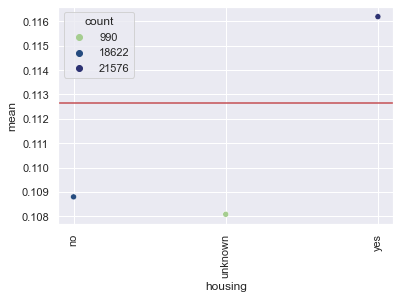

In [182]:
grafico_balanceador('housing')

Las personas que tienen un prestamo para comprar un hogar son ligeramente mas propensas a adquirir el plazo fijo que las que no lo tienen. Es tan pequeña la diferencia que puede ser azar.

<ipython-input-175-b09e2dde04e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe['y'] = Dataframe['y'].replace('no', 0)
<ipython-input-175-b09e2dde04e6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe['y'] = Dataframe['y'].replace('yes', 1)


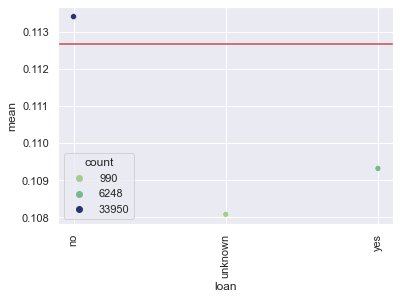

In [183]:
grafico_balanceador('loan')

<ipython-input-175-b09e2dde04e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe['y'] = Dataframe['y'].replace('no', 0)
<ipython-input-175-b09e2dde04e6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe['y'] = Dataframe['y'].replace('yes', 1)


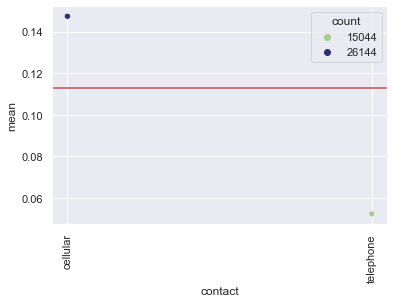

In [184]:
grafico_balanceador('contact')

<ipython-input-185-77612fbb384e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['contact'] = DF['contact'].replace('telephone', 0)
<ipython-input-185-77612fbb384e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['contact'] = DF['contact'].replace('cellular', 1)
<ipython-input-185-77612fbb384e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

<AxesSubplot:xlabel='age', ylabel='contact'>

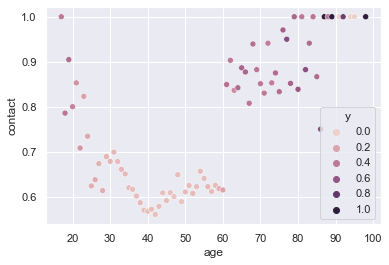

In [185]:
DF = df[['contact', 'age', 'y']]
DF['contact'] = DF['contact'].replace('telephone', 0)
DF['contact'] = DF['contact'].replace('cellular', 1)
DF['y'] = DF['y'].replace('no', 0)
DF['y'] = DF['y'].replace('yes', 1)
Edad_Contacto = DF.groupby('age').agg({'contact':'mean','y':'mean'})
sns.scatterplot(data = Edad_Contacto, x = 'age', y = 'contact', hue = 'y')

Muy interesante ver que las personas que atendieron la llamada por celular tienen muchas mas chances que las que atendieron por telefono de tomar el plazo fijo.
Tambien realice un grafico para ver la relación entre edad y el contacto para ver si hay algun tipo de realación. Se ve que a edades mas bajas se utiliza mas el celular que el telefono y a edades mas altas baja la proporción. Nuevamente se ve el rango de edades entre 20 y 25 que tiene chances de tomar el plazo fijo altas, y tambien utilizan mucho el celular.

<ipython-input-175-b09e2dde04e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe['y'] = Dataframe['y'].replace('no', 0)
<ipython-input-175-b09e2dde04e6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe['y'] = Dataframe['y'].replace('yes', 1)


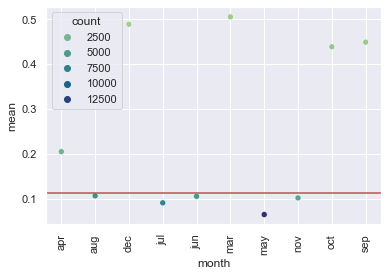

In [186]:
grafico_balanceador('month')

Interesante ver que en el mes de mayo fue cuando mas llamadas se realizaron, pero tambien fue cuando menor ratio de aceptacion del plazo fijo se obtuvo.
Por otro lado, por ejemplo en abril, la aceptación fue practicamente el doble que el promedio y la cantidad de datos no es menor (alrededor de 2500).
Podria ser interesante evaluar junto con la empresa si hay alguna razon validada con conocimiento del negocio de porque se toman mas plazos fijos en abril que en mayo

<ipython-input-175-b09e2dde04e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe['y'] = Dataframe['y'].replace('no', 0)
<ipython-input-175-b09e2dde04e6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe['y'] = Dataframe['y'].replace('yes', 1)


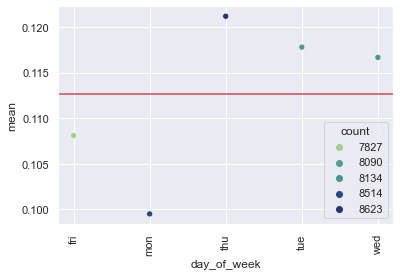

In [187]:
grafico_balanceador('day_of_week')

Pareceria que los Lunes son días especialmente malos para aceptar el plazo fijo, mientras que los Jueves son los mejores, pero la realidad es que no cambia tanto, podria ser azar.

<ipython-input-175-b09e2dde04e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe['y'] = Dataframe['y'].replace('no', 0)
<ipython-input-175-b09e2dde04e6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe['y'] = Dataframe['y'].replace('yes', 1)


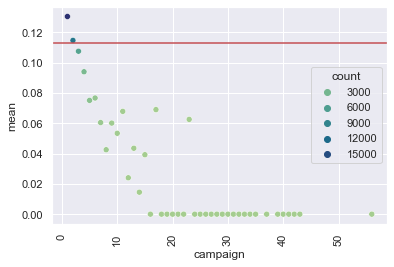

In [188]:
grafico_balanceador('campaign')

Parece que las personas a las que se las contacto menos veces tienen mas chances de tomar el plazo fijo. Podria ser que la gente decide si aceptarlo o no con los primeros intentos y seguir insistiendo no cambia mucho el resultado.

<ipython-input-175-b09e2dde04e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe['y'] = Dataframe['y'].replace('no', 0)
<ipython-input-175-b09e2dde04e6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe['y'] = Dataframe['y'].replace('yes', 1)


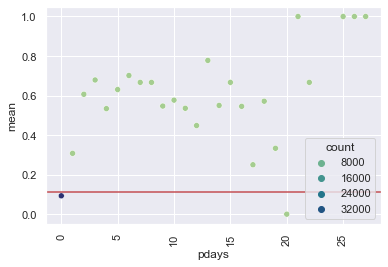

In [189]:
grafico_balanceador('pdays')

Se puede ver que practicamente todos los puntos estan acumulados en el grupo de clientes con los que no se tuvo un contacto previo.

<ipython-input-175-b09e2dde04e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe['y'] = Dataframe['y'].replace('no', 0)
<ipython-input-175-b09e2dde04e6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe['y'] = Dataframe['y'].replace('yes', 1)


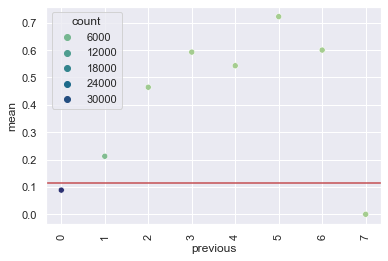

In [190]:
grafico_balanceador('previous')

Este grafico cumple tambien con lo dicho en el de arriba.

<ipython-input-175-b09e2dde04e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe['y'] = Dataframe['y'].replace('no', 0)
<ipython-input-175-b09e2dde04e6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe['y'] = Dataframe['y'].replace('yes', 1)


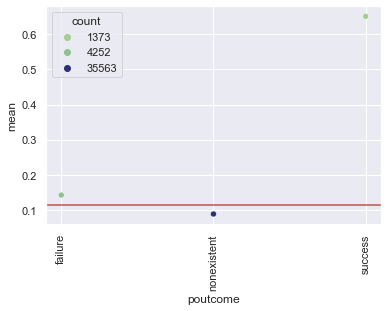

In [191]:
grafico_balanceador('poutcome')

La mayoria de las campañas son nuevas (cerca del promedio), pero para las que no son nuevas, se ve mucha diferencia entre campañas anteriores exitosas y no exitosas. En las exitosas sube muchisimo la probabilidad de tomar el plazo fijo.
Tambien es interesante ver que aunque no sea exitosa, sube la chance de tomar el plazo fijo por arriba del promedio, por lo que simplemente con existir una campaña previa podria aumentarse el ratio.

<ipython-input-175-b09e2dde04e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe['y'] = Dataframe['y'].replace('no', 0)
<ipython-input-175-b09e2dde04e6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe['y'] = Dataframe['y'].replace('yes', 1)


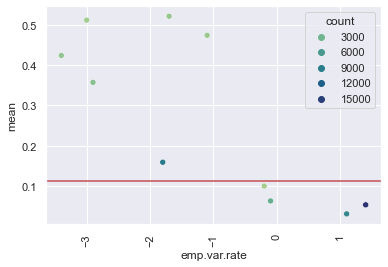

In [192]:
grafico_balanceador('emp.var.rate')

Si evaluamos los casos de mayor densidad de eventos, podemos ver 2 puntos, uno con emp.var.rate negativo y uno positivo. En el negativo se toman mas plazos fijos y en el positivo menos. Al haber menos empleo la gente parece tomar mas plazos fijos, lo cual es parece lógico.

<ipython-input-175-b09e2dde04e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe['y'] = Dataframe['y'].replace('no', 0)
<ipython-input-175-b09e2dde04e6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe['y'] = Dataframe['y'].replace('yes', 1)


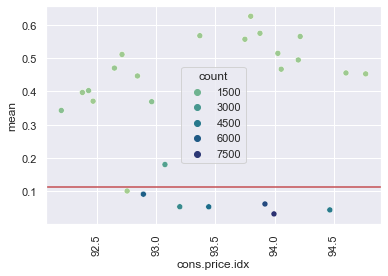

In [193]:
grafico_balanceador('cons.price.idx')

Este valor representa la inflación en Brazil al momento de la llamada (medida cuatrimestralmente). Se ve una tendencia (si se ven los casos con mayores datos) de bajar el ratio de toma de plazo fijo a medidad que la inflación aumenta.

<ipython-input-175-b09e2dde04e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe['y'] = Dataframe['y'].replace('no', 0)
<ipython-input-175-b09e2dde04e6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe['y'] = Dataframe['y'].replace('yes', 1)


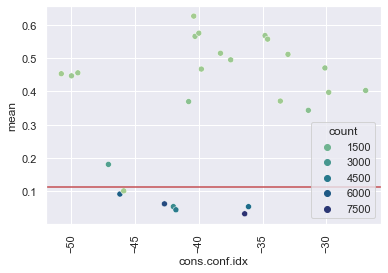

In [194]:
grafico_balanceador('cons.conf.idx')

<ipython-input-175-b09e2dde04e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe['y'] = Dataframe['y'].replace('no', 0)
<ipython-input-175-b09e2dde04e6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe['y'] = Dataframe['y'].replace('yes', 1)


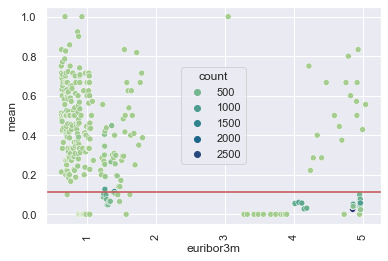

In [195]:
grafico_balanceador('euribor3m')

<ipython-input-175-b09e2dde04e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe['y'] = Dataframe['y'].replace('no', 0)
<ipython-input-175-b09e2dde04e6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe['y'] = Dataframe['y'].replace('yes', 1)


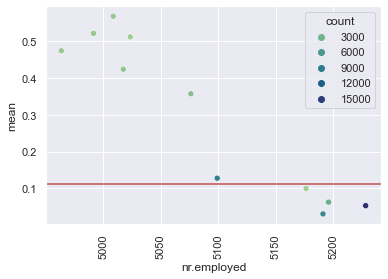

In [196]:
grafico_balanceador('nr.employed')

Este gráfico parece mostrar que mientras mas número de empleados hay, menor es la chance de que la persona tome el plazo fijo. Podria deberse a que mientras mas empleados tiene el banco, mas dinero se gasta en sueldos y por lo tanto la tasa de interes tendra que ser menor.

<ipython-input-197-8cf591f8b443>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe['y'] = Dataframe['y'].replace('no', 0)
<ipython-input-197-8cf591f8b443>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe['y'] = Dataframe['y'].replace('yes', 1)


<function matplotlib.pyplot.show(close=None, block=None)>

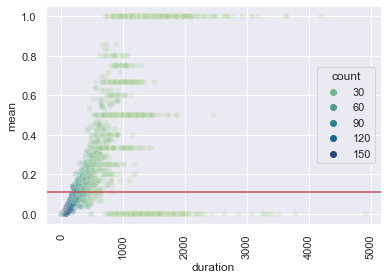

In [197]:
# Utilizando grafico_balanceador estaria obteniendo una imagen poco interpretable por la cantidad de puntos acumulados.
# Por esto tomo directamente el codigo utilizado y le agrego un alpha = 0.2 para que se visualice mejor:

Dataframe = df[['duration', 'y']]
Dataframe['y'] = Dataframe['y'].replace('no', 0)
Dataframe['y'] = Dataframe['y'].replace('yes', 1)
Para_graficar = Dataframe.groupby('duration').y.agg(['count', 'mean'])
grafico = sns.scatterplot(data = Para_graficar, x = 'duration', y = 'mean', hue = 'count', palette = 'crest', alpha = 0.2)
grafico.axhline(Dataframe.y.mean(), color = 'r')
grafico.tick_params(axis='x', rotation=90)
plt.show

Parece haber una relación entre el tiempo que dura la llamada y el target, lo cual como se discutio antes, tiene mucho sentido.

Se va a realizar un test de chi2 para determinar esto.

H0 = Duration y target son independientes H1 = Duration y target no son independientes, y por lo tanto estan relacionadas

In [198]:
x = df.duration.values.reshape(-1,1)
x.shape

(41188, 1)

In [199]:
chi2(x, df.y)

(array([1760733.1286323]), array([0.]))

El test no llega a informar ningun número, por lo que se asume que el p-valor es tan bajo que rechazamos H0 a cualquier nivel de significacia (PEDRO, ESTO ESTA BIEN? O HAY ALGUN OTRO ERROR?).

Es interesante evaluar si hay correlación entre la duración de la llamada y el target desde un punto de vista de exploración de datos y entendimiento del problema del negocio, pero en si esta es una variable que no va a poder ser utilizada por la empresa para realizar ningun tipo de predicción. La duración de una llamada es una dato que solo es conocido luego de que se haya realizado ésta. Tambien si pensamos en la causalidad asociada a estas 2 variables, la duración de la llamada seria la causa de si el cliente acepta o no el plazo fijo y no al reves. Es por esto que no sera una variable que se utilizara para entrenar al modelo.

<AxesSubplot:>

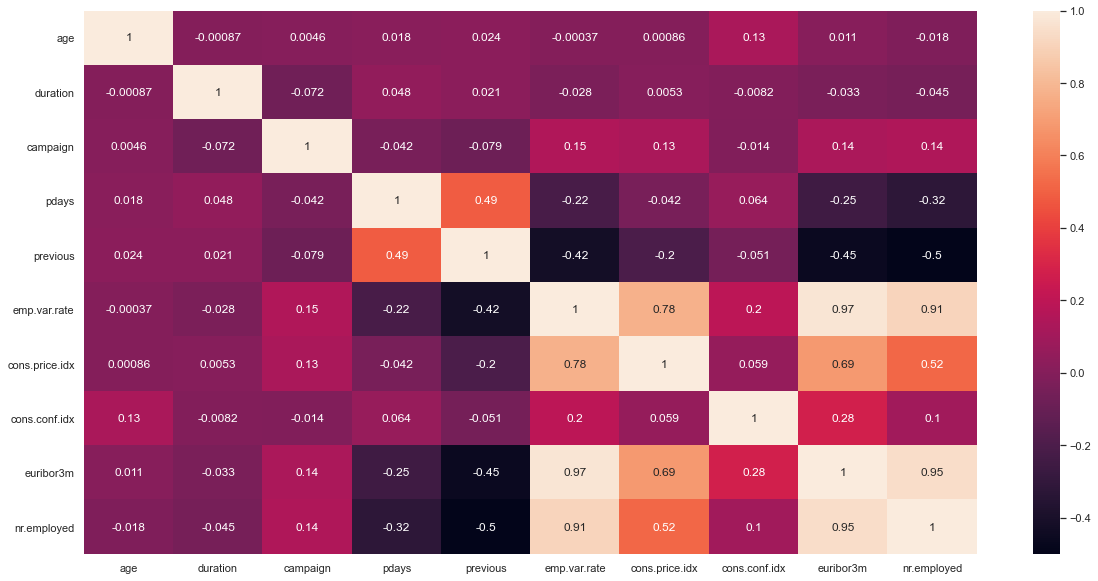

In [200]:
# Por ultimo se va a ver la correlación de Pearson que existe entre las diferentes variables numericas con un heatmap:


df_numericos = df.select_dtypes(exclude=["bool_","object_"])


plt.figure(figsize=(20,10))
Correlaciones = sns.heatmap(df_numericos.corr(),annot =True)
Correlaciones

Se puede observar que como habiamos dicho, emp.var.rate tiene bastante correlación positiva con otros atributos. Tambien sucede con cons.price.idx, euribor3m y nr.employed.
Fuera de estos atributos, pdays parece tener relación.